In [2]:
import deeplabcut
import dlclive

2023-10-26 10:14:45.069259: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-26 10:14:45.132693: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-26 10:14:45.148665: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-26 10:14:45.444978: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: li

Loading DLC 2.3.6...


/home/jakejoseph/anaconda3/envs/new_dlc_env/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/jakejoseph/anaconda3/envs/new_dlc_env/lib/python3.8/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [3]:

# Define paths
config_path = '/home/jakejoseph/Desktop/FES_V1-Joseph-2023-10-16/config.yaml'
shuffle = 1  # Usually 1, unless you've trained multiple shuffles
snapshot_index = -1  # Typically -1 to use the latest snapshot

# Export the model
# deeplabcut.export_model(config_path, shuffle=shuffle, snapshot_index=snapshot_index, make_tar=False)
deeplabcut.export_model(cfg_path=config_path, snapshotindex=-1,TFGPUinference=True,make_tar=False)


/home/jakejoseph/anaconda3/envs/new_dlc_env/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
2023-10-26 10:14:51.004288: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-26 10:14:51.039111: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/jakejoseph/anaconda3/envs/new_dlc_env/lib/python3.8/site-packages/cv2/../../lib64:
2023-10-26 10:14:51.039125: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing 

FileExistsError: Export directory /home/jakejoseph/Desktop/FES_V1-Joseph-2023-10-16/exported-models/DLC_FES_V1_resnet_50_iteration-0_shuffle-1 already exists. Terminating export...

In [14]:

dlclive.benchmark_videos('/home/jakejoseph/Desktop/FES_V1-Joseph-2023-10-16/exported-models/DLC_FES_V1_resnet_50_iteration-0_shuffle-1',
                          '/home/jakejoseph/Desktop/FES_V1-Joseph-2023-10-16/videos/NapierCharacterization20230801NoText.mp4',
                          resize=0.5, pcutoff=0.9, display_radius=8, cmap='bmy', output= '/home/jakejoseph/Desktop/FES_V1-Joseph-2023-10-16/')


Run 1 / 1



100%|██████████| 1000/1000 [02:22<00:00,  7.04it/s]
fatal: not a git repository (or any of the parent directories): .git


In [20]:
df

{'model': 'DLC_FES_V1_resnet_50_iteration-0_shuffle-1',
 'model_type': 'resnet',
 'TFGPUinference': True,
 'im_size': array([[960, 540]]),
 'inference_times': array([[0.14032626, 0.13995767, 0.13991475, 0.14085698, 0.14050698,
         0.13951468, 0.14005971, 0.14680004, 0.14165711, 0.13747716,
         0.14073324, 0.14035392, 0.14138007, 0.13798904, 0.14014053,
         0.14370728, 0.1394155 , 0.13872266, 0.13864303, 0.1398561 ,
         0.13846564, 0.14041162, 0.13693452, 0.13998318, 0.13825059,
         0.13739252, 0.14263511, 0.13792896, 0.13970113, 0.13834095,
         0.13773227, 0.13910747, 0.14052534, 0.13958192, 0.14096713,
         0.14041519, 0.13840675, 0.13758111, 0.13970089, 0.13964248,
         0.13937378, 0.13759017, 0.13833451, 0.14001155, 0.13819361,
         0.13840103, 0.14081335, 0.1393702 , 0.14087057, 0.14143395,
         0.13838434, 0.14121103, 0.14106679, 0.13908243, 0.13921428,
         0.14132142, 0.14035559, 0.13738585, 0.14085221, 0.13872719,
         0.140

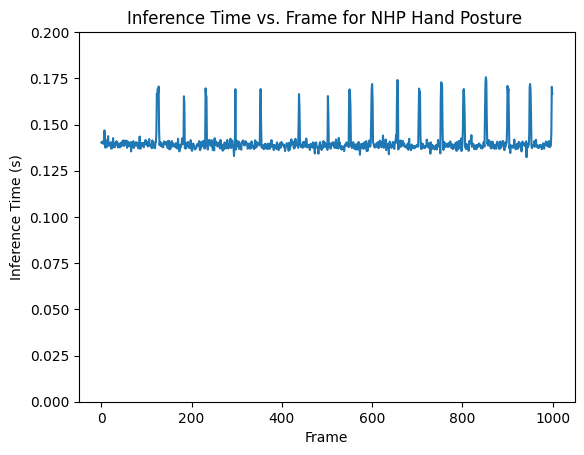

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
filepath = '/home/jakejoseph/Desktop/FES_V1-Joseph-2023-10-16/benchmark_eros_CPU_1.pickle'

df = pd.read_pickle(filepath)
# print(df['inference_times'])

plt.plot(df['inference_times'][0])
plt.xlabel('Frame')
plt.ylabel('Inference Time (s)')
plt.title('Inference Time vs. Frame for NHP Hand Posture ')
plt.ylim([0,0.2])
plt.show()

In [42]:
import h5py
import numpy as np

# Load the data

f = h5py.File('/home/jakejoseph/Desktop/FES_V1-Joseph-2023-10-16/videos/NapierCharacterization20230801NoTextDLC_resnet50_FES_V1Oct16shuffle1_100000_labeled_DLCLIVE_POSES.h5', 'r')


In [41]:
def load_data_from_h5(file_path):
    # Load the DataFrame from the HDF5 file
    with h5py.File(file_path, 'r') as f:
        # Extract data values
        data_values = f['/df_with_missing/block0_values'][:]
        # Extract column names
        axis0_level0 = [i.decode() for i in f['/df_with_missing/axis0_level0'][:]]
        axis0_level1 = [i.decode() for i in f['/df_with_missing/axis0_level1'][:]]
        axis0_label0 = f['/df_with_missing/axis0_label0'][:]
        axis0_label1 = f['/df_with_missing/axis0_label1'][:]
        columns = [(axis0_level0[i], axis0_level1[j]) for i, j in zip(axis0_label0, axis0_label1)]
        # Extract row names
        index = [i.decode() if isinstance(i, bytes) else i for i in f['/df_with_missing/axis1'][:]]
    # Create a DataFrame
    df = pd.DataFrame(data_values, columns=pd.MultiIndex.from_tuples(columns), index=index)
    return df

def extract_body_parts(df):
    body_parts_data = {}
    for body_part in df.columns.levels[0]:
        body_parts_data[body_part] = {
            'x': df[body_part]['x'].values,
            'y': df[body_part]['y'].values,
            'likelihood': df[body_part]['likelihood'].values
        }
    return body_parts_data

file_path = 'home/jakejoseph/Desktop/FES_V1-Joseph-2023-10-16/videos/NapierCharacterization20230801NoTextDLC_resnet50_FES_V1Oct16shuffle1_100000_labeled_DLCLIVE_POSES.h5'
df = load_data_from_h5(file_path)
body_parts_data = extract_body_parts(df)

# Example of accessing x, y, and likelihood values for the 'DIP' body part
dip_x = body_parts_data['DIP']['x']
dip_y = body_parts_data['DIP']['y']
dip_likelihood = body_parts_data['DIP']['likelihood']


FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'home/jakejoseph/Desktop/FES_V1-Joseph-2023-10-16/videos/NapierCharacterization20230801NoTextDLC_resnet50_FES_V1Oct16shuffle1_100000_labeled_DLCLIVE_POSES.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
dlclive.benchmark_videos('/path/to/exported/model', ['/path/to/video1', '/path/to/video2'], output='/path/to/output', resize=[1.0, 0.75, '0.5'])
dlclive.benchmark_videos('/path/to/exported/model', '/path/to/video', resize=0.5, display=True, pcutoff=0.5, display_radius=4, cmap='bmy')
dlclive.benchmark_videos('/path/to/exported/model', '/path/to/video', resize=[1.0, 0.75, 0.5], pcutoff=0.5, display_radius=4, cmap='bmy', save_poses=True, save_video=True)

## Ignore code below, used GUI for those steps

In [7]:
config_path = deeplabcut.create_new_project('FES_test',
                              'Jake',
                              ['/home/jakejoseph/Desktop/joker_videos/MVI_0226.MOV'],
                                working_directory='/home/jakejoseph/Desktop/joker_videos',
                                copy_videos=False,
                                videotype='.MOV',
                                multianimal=False
                              )

Project "/home/jakejoseph/Desktop/joker_videos/FES_test-Jake-2023-09-25" already exists!


In [18]:
deeplabcut.extract_frames(config_path)

Config file read successfully.
Do you want to extract (perhaps additional) frames for video: /home/jakejoseph/Desktop/joker_videos/MVI_0226.MOV ?


Frames were successfully extracted, for the videos listed in the config.yaml file.

You can now label the frames using the function 'label_frames' (Note, you should label frames extracted from diverse videos (and many videos; we do not recommend training on single videos!)).


In [16]:
deeplabcut.label_frames(config_path)